# Final Project GUIDO 

Mentor : Ade Irawan

Author :
1. Abdullah Ilman Fahmi
2. Deneva Widyaningtyas
3. Ghaisani Anindya Ayuningtyas
4. Naufal Faherza Putra
5. Dimas Susanto
6. Rahmi Ramadhani

Dataset : https://www.kaggle.com/rodsaldanha/arketing-campaign

# Problem Statement

Dikarenakan pandemi Covid-19, Guido’s Market perlu melakukan marketing campaign untuk meningkatkan penjualan dan customer engagement. Di campaign terakhir, hanya 15% pelanggan yang menerima campaign tersebut. Hal ini menyebabkan perbedaan sebesar $3046 antara Cost dan Revenue. 

Tim Data Science dari Guido’s Market diberikan tugas untuk meningkatkan respon pelanggan terhadap campaign selanjutnya dengan harapan dapat meningkatkan pendapatan Guido’s Market untuk tahun ini dan tahun-tahun kedepannya. Untuk menyelesaikan tugas tersebut, tim Data Science Guido’s Market membuat model yang memberikan rekomendasi kriteria penting untuk menentukan pelanggan yang akan diberikan campaign selanjutnya. Metric yang akan menentukan kesuksesan dari tugas yang diberikan kepada tim data science adalah response rate pelanggan terhadap campaign selanjutnya. 


## Stage 1 -  Data Descriptive & Pre Proccessing

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.19.5
pandas version :  1.1.5
seaborn version :  0.11.1


In [ ]:
df = pd.read_csv('marketing_campaign.csv', sep=';')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.shape 

(2240, 29)

Berdasarkan dataset yang dimiliki terdapat 2240 baris (data customer) dan 29 kolom.

### Informasi Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Menggunakan fungsi info, Kita dapat menemukan beberapa informasi mengenai dataset, diantaranya:
1. terdapat 26 kolom data numerical, yakni sebanyak 25 kolom tipe data integer dan 1 kolom tipe float.
2. terdapat 3 kolom data categorical dengan tipe object.
3. pada kolom income, terdapat 2216 dari 2240 data customer, kemungkinan adanya data kosong (Null) pada kolom tersebut.

### Data Numerical dan Data Categorical

In [ ]:
nums = ['Year_Birth','Income', 'Kidhome','Teenhome','Recency', 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 
        'MntSweetProducts','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
        'NumWebVisitsMonth','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 
        'Z_CostContact', 'Z_Revenue', 'Response']
cats = ['Education', 'Marital_Status', 'Dt_Customer']

#### A. Describe Data Numerical

In [ ]:
df[nums].describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


#### B. Grafik dan Distribusi plot Data Numerical

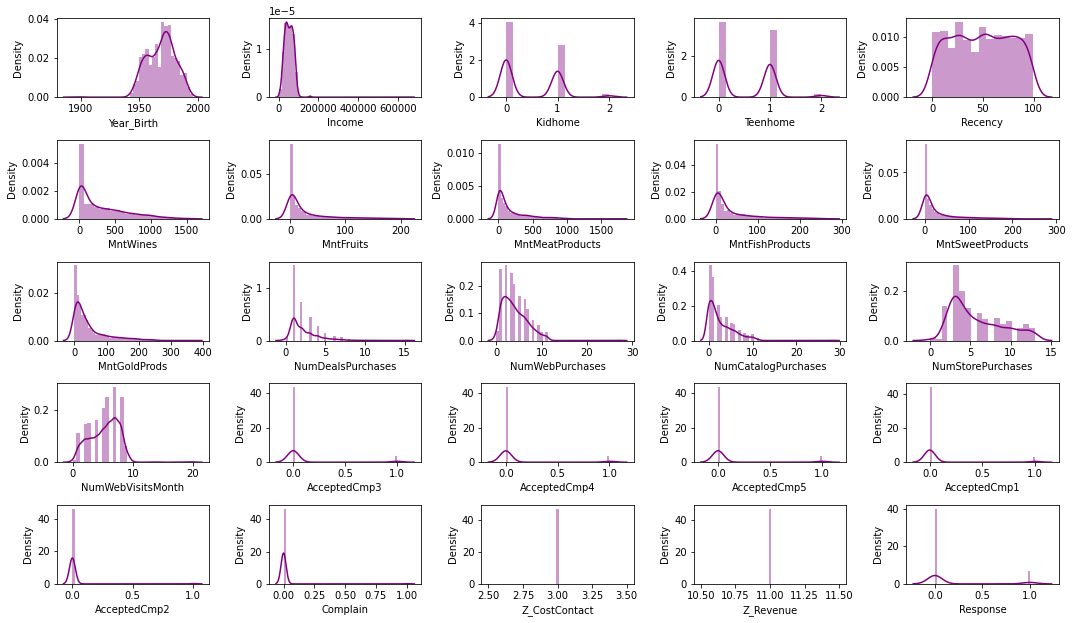

In [ ]:
plt.figure(figsize=(15, 10))
for i in range (0, len(nums)):
    plt.subplot(6, len(nums)/5, i+1)
    sns.distplot(df[nums[i]], color='purple')
    plt.tight_layout()

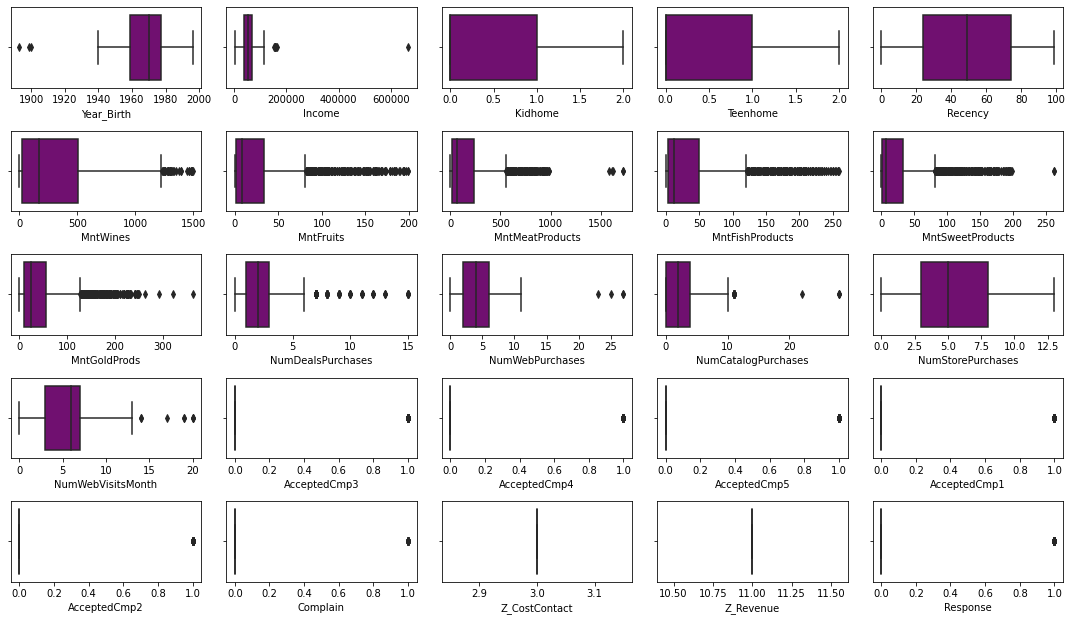

In [ ]:
plt.figure(figsize=(15, 10))
for i in range (0, len(nums)):
    plt.subplot(6, len(nums)/5, i+1)
    sns.boxplot(df[nums[i]], color='purple', orient = 'v')
    plt.tight_layout()

Untuk boxplot, hal yang paling dapat diperhatikan adalah keberadaan outlier.
1. Outlier terlihat utamanya pada kolom `year_birth, income, amount wines, amount fruits, amount meat product, amount fish products, amount  sweet products, amount gold product,  Num deals purchases, Num web purchases, num catalog purchases, num web visits month`.
2. Dari boxplotnya terlihat mana distribusi yang terlihat cenderung normal distribution :`Recency, Num store purchases, Z_cost contact, dan Z_revenue`
3. Pada kolom `Recency dan Num store` memiliki keragaman data yang cenderung lebih besar daripada kolom `Z_cost contact dan Z_revenue`, hal ini terlihat dari bentuk kotak boxplotnya.
4. Dari boxplotnya terlihat mana distribusi yang terlihat cenderung positively skewed:  `income, kidhome, teenhome, amount wines, amount fruits, amount meat product, amount fish products, amount  sweet products, amount gold product,  Num deals purchases, Num web purchases, num catalog purchases, num web visits month`
5. Dari boxplotnya terlihat mana distribusi yang terlihat cenderung negatively skewed: `year_birth`,
6. kecenderungan positively / negatively skewed dikarenakan adanya nilai outlier. oleh karena itu perlu adanya normalisasi data.

#### C. Describe Data Categorical

In [ ]:
df[cats].describe()

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,2012-08-31
freq,1127,864,12


In [ ]:
for i in cats:
    print(f'''jumlah nilai dari kolom {i}:''')
    print(df[i].value_counts())
    print()

jumlah nilai dari kolom Education:
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

jumlah nilai dari kolom Marital_Status:
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

jumlah nilai dari kolom Dt_Customer:
2012-08-31    12
2012-09-12    11
2014-05-12    11
2013-02-14    11
2014-05-22    10
              ..
2012-12-17     1
2014-06-12     1
2012-11-04     1
2014-04-10     1
2014-03-27     1
Name: Dt_Customer, Length: 663, dtype: int64



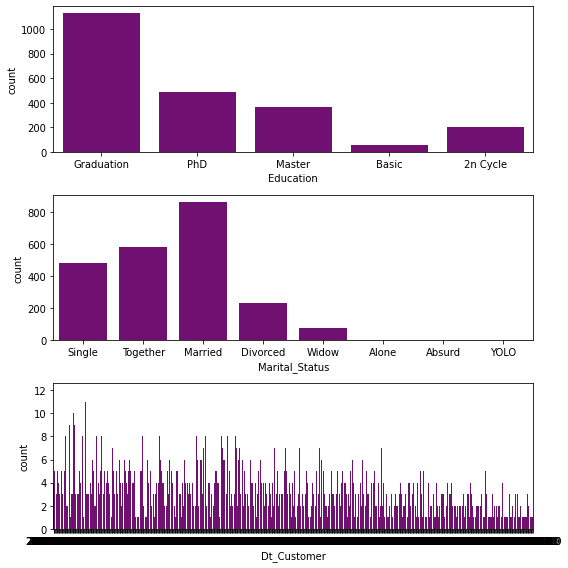

In [ ]:
plt.figure(figsize=(8, 8))
for i in range(0, len(cats)):
    plt.subplot(3,1, i+1)
    sns.countplot(df[cats[i]], color='purple', orient='v')
    plt.tight_layout()

Beberapa pengamatan dari statistical summary kolom kategorikal di atas:
1. Kolom Dt_customer memiliki jumlah nilai unik yang banyak
2. Sebaran nilai di kolom Dt_customer terlihat merata, sedangkan Education dan Marital_status terlihat didominasi nilai tertentu, yakni masing-masing didominasi oleh Graduation dan Married
3. Pada kolom Marital status, pilihan kategorinya yang cukup ambigu seperti “absurd”, “Yolo”, antara “single” dengan “alone”, hal ini pada kolom marital status dapat dijadikan 2 kategori single dan not single

### Data Pre processing

#### A. Mendeteksi dan Mengatasi Missing Value

In [ ]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
## Mengisi Missing Value nilai rata-rata income berdasarkan education
def GroupIncome(x):
    dfedu = round(df.groupby(['Education']).mean().reset_index(),0)
    if x == 'Graduation':
        return dfedu.loc[dfedu['Education']=='Graduation','Income']
    elif x == '2n Cycle':
        return dfedu.loc[dfedu['Education']=='2n Cycle','Income']
    elif x == 'Basic':
        return dfedu.loc[dfedu['Education']=='Basic','Income']
    elif x == 'Master':
        return dfedu.loc[dfedu['Education']=='Master','Income']
    elif x == 'PhD':
        return dfedu.loc[dfedu['Education']=='PhD','Income']

In [ ]:
 # Handle Missing Value dengan Mean
for idx,col in df[df['Income'].isnull()].iterrows():
    df['Income'][idx] = GroupIncome(col['Education'])

In [ ]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
df.iloc[2233]

ID                           9432
Year_Birth                   1977
Education              Graduation
Marital_Status           Together
Income                     666666
Kidhome                         1
Teenhome                        0
Dt_Customer            2013-06-02
Recency                        23
MntWines                        9
MntFruits                      14
MntMeatProducts                18
MntFishProducts                 8
MntSweetProducts                1
MntGoldProds                   12
NumDealsPurchases               4
NumWebPurchases                 3
NumCatalogPurchases             1
NumStorePurchases               3
NumWebVisitsMonth               6
AcceptedCmp3                    0
AcceptedCmp4                    0
AcceptedCmp5                    0
AcceptedCmp1                    0
AcceptedCmp2                    0
Complain                        0
Z_CostContact                   3
Z_Revenue                      11
Response                        0
Name: 2233, dt

In [ ]:
df_new = df.drop(df.index[[2233]], axis = 0) 
df_new

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


Notes :

1. Missing value terdapat pada feature income sebanyak 24. 
2. Missing value kemudian diisi dengan nilai rata-rata income berdasarkan Education
3. Setelah dilakukan pula pengecekan statistik pada data, terlihat bahwa nilai maksimal kolom Income yaitu sebesar 666666 yang kemungkinan merupakan data outlier, karena nominalnya sangat berbeda dari lainnya dan terlihat tidak masuk akal. Sehingga dilakukan drop pada baris tersebut, yang berada pada indeks 2233. 
4. Jumlah data setelah indeks 2233 dihapus adalah 2239

#### B. Mengatasi Data Duplicate

In [ ]:
df_new.duplicated(subset=['Year_Birth', 'Education','Marital_Status' ,'Income']).sum()

201

In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [ ]:
dups = df_new[df_new[['Year_Birth','Education','Marital_Status', 'Income']].duplicated() == True].sort_values(by=['Income'])
dups.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1138,10617,1989,Master,Divorced,10979.0,0,0,2014-05-22,34,8,4,10,2,2,4,2,3,0,3,5,0,0,0,0,0,0,3,11,0
1203,234,1979,Graduation,Divorced,15287.0,1,0,2012-10-10,60,1,2,8,4,3,13,2,1,1,2,7,1,0,0,0,0,0,3,11,1
1107,10065,1970,2n Cycle,Married,15315.0,0,0,2013-08-03,27,7,4,13,15,8,17,2,2,0,4,5,0,0,0,0,0,0,3,11,0
1596,24,1960,Master,Together,17144.0,1,1,2014-02-15,96,18,2,19,0,2,6,5,3,0,4,7,0,0,0,0,0,0,3,11,0
1424,4086,1959,Graduation,Married,18690.0,0,0,2012-12-28,77,6,1,7,23,4,19,1,1,1,2,8,0,0,0,0,0,0,3,11,0


In [ ]:
dfgrup = df_new.groupby(['Year_Birth','Education','Marital_Status', 'Income']).count().sort_values(by=['ID'],ascending=False)
dfgrup = dfgrup[dfgrup['ID']>1]

In [ ]:
dfgrup.sum()

ID                     394
Kidhome                394
Teenhome               394
Dt_Customer            394
Recency                394
MntWines               394
MntFruits              394
MntMeatProducts        394
MntFishProducts        394
MntSweetProducts       394
MntGoldProds           394
NumDealsPurchases      394
NumWebPurchases        394
NumCatalogPurchases    394
NumStorePurchases      394
NumWebVisitsMonth      394
AcceptedCmp3           394
AcceptedCmp4           394
AcceptedCmp5           394
AcceptedCmp1           394
AcceptedCmp2           394
Complain               394
Z_CostContact          394
Z_Revenue              394
Response               394
dtype: int64

In [ ]:
dups_clean = df_new.drop_duplicates(subset=['Year_Birth', 'Education','Marital_Status' ,'Income'], inplace = True)
dups_clean

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2038 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2038 non-null   int64  
 1   Year_Birth           2038 non-null   int64  
 2   Education            2038 non-null   object 
 3   Marital_Status       2038 non-null   object 
 4   Income               2038 non-null   float64
 5   Kidhome              2038 non-null   int64  
 6   Teenhome             2038 non-null   int64  
 7   Dt_Customer          2038 non-null   object 
 8   Recency              2038 non-null   int64  
 9   MntWines             2038 non-null   int64  
 10  MntFruits            2038 non-null   int64  
 11  MntMeatProducts      2038 non-null   int64  
 12  MntFishProducts      2038 non-null   int64  
 13  MntSweetProducts     2038 non-null   int64  
 14  MntGoldProds         2038 non-null   int64  
 15  NumDealsPurchases    2038 non-null   i

Notes :

Setelah dilakukan pengecekan data duplikat, diketahui bahwa berdasarkan subset pada 4 kolom 'Year_Birth', 'Education', 'Marital_Status', 'Income', ditemukan sebanyak 201 data duplikat. Data ini terlihat memiliki ID yang berbeda, namun untuk isi dari kolom lainnya terlihat sama persis.

Kemudian data duplikat di handle dengan cara dihapus, dan menyisakan 2038 data

#### C. Outliers

In [ ]:
demography = ['Year_Birth','Income', 'Kidhome','Teenhome']
product = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds']
purchase = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
level = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2']
other = ['Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
categoric = ['Education','Marital_Status','Dt_Customer']
pur = product+purchase

##### C.1 Demography

In [ ]:
Q1 = df_new['Year_Birth'].quantile(0.25)
Q3 = df_new['Year_Birth'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)
low_limit

1932.0

In [ ]:
df_new[(df_new['Year_Birth']<=1932)].sort_values('Year_Birth')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0


In [ ]:
Q1 = df_new['Income'].quantile(0.25)
Q3 = df_new['Income'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)
high_limit

117145.5

In [ ]:
df_new[(df_new['Income']>=117145)].sort_values('Income')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,3,11,0
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,3,11,0


- Melakukan DROP Outlier dengan IQR - 

Data outlier yang dihapus adalah pada kolom 'Year_Birth', dan indeks ke 2233 (yang telah dihapus sebelumnya)

In [ ]:
# Kolom Year_Birth
print(f'Jumlah baris sebelum memfilter outlier: {len(df_new)}')

filtered_entries = np.array([True] * len(df_new))
for col in ['Year_Birth']:
    Q1 = df_new[col].quantile(0.25)
    Q3 = df_new[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_new[col] >= low_limit) & (df_new[col] <= high_limit)) & filtered_entries
    
df_new = df_new[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_new)}')

Jumlah baris sebelum memfilter outlier: 2038
Jumlah baris setelah memfilter outlier: 2035


In [ ]:
print(df_new[['NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases','NumWebVisitsMonth']].describe())

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count        2035.000000       2035.00000          2035.000000   
mean            2.330221          4.10172             2.659951   
std             1.935043          2.80135             2.937290   
min             0.000000          0.00000             0.000000   
25%             1.000000          2.00000             0.000000   
50%             2.000000          4.00000             2.000000   
75%             3.000000          6.00000             4.000000   
max            15.000000         27.00000            28.000000   

       NumWebVisitsMonth  
count        2035.000000  
mean            5.313022  
std             2.438789  
min             0.000000  
25%             3.000000  
50%             6.000000  
75%             7.000000  
max            20.000000  


In [ ]:
df_new.shape

(2035, 29)

Berdasarkan data, nilai outlier yang dibersihkan adalah pada kolom year_birth sehingga total data menjadi 2035

#### D. Feature Engineering

##### D.1 Label Encoding

In [ ]:
# Mengubah Dt_Cutomer menjadi data Numeric

df_new['Dt_Customer'] = pd.to_datetime(df_new['Dt_Customer'])
df_new['Year_Customer'] = df_new['Dt_Customer'].apply(lambda x:x.year)

# Menjumlahkan Kidhome dan Teenhome
df_new['Child'] = df_new[['Kidhome', 'Teenhome']].sum(axis=1)

# Menjumlahkan seluruh amount spent customer 
df_new['Monetary'] = df_new[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Menjumlahkan seluruh pembelian customer dari berbagai platform
df_new['Frequency'] = df_new[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Mengubah Data Marital Status menjadi 2 kategori Single dan Not Single
df_new['MaritalStat'] = np.where(((df_new['Marital_Status'] == 'Married')| (df_new['Marital_Status'] == 'Together')), 'NotSingle', 'Single')

# Menjumlahkan Accepted Campaign 1-5 
df_new['AcceptedCmp'] = df_new[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

In [ ]:
mnt = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
dfmnt = df_new[mnt]

#Ambil category dengan nilai terbesar
df_new['TopCategory'] = dfmnt.idxmax(axis = 1)


# Memastikan pengkategorian sudah sesuai
allmnt = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','TopCategory']
df_new[allmnt].sample(10)

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TopCategory
1453,37,0,17,0,0,3,MntWines
951,42,0,17,0,0,18,MntWines
323,731,60,353,78,12,73,MntWines
1142,1,5,8,4,8,20,MntGoldProds
259,11,0,4,0,0,2,MntWines
576,117,0,22,13,0,30,MntWines
1116,16,2,18,3,0,24,MntGoldProds
978,30,9,12,2,11,30,MntWines
1135,166,5,107,11,8,29,MntWines
2138,104,12,48,4,12,5,MntWines


In [ ]:
df_new

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Customer,Child,Monetary,Frequency,MaritalStat,AcceptedCmp,TopCategory
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012,0,1617,22,Single,0,MntWines
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014,2,27,4,Single,0,MntWines
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013,0,776,20,NotSingle,0,MntWines
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2014,1,53,6,NotSingle,0,MntMeatProducts
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2014,1,422,14,NotSingle,0,MntWines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,Graduation,Single,26816.0,0,0,2012-08-17,50,5,1,6,3,4,3,1,0,0,3,4,0,0,0,0,0,0,3,11,0,2012,0,22,3,Single,0,MntMeatProducts
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,2013,1,1341,16,NotSingle,0,MntWines
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,2014,0,1241,18,Single,1,MntWines
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,2014,1,843,21,NotSingle,0,MntWines


##### D.2 One Hot Encoding 

In [ ]:
categ = ['MaritalStat', 'Education']
for cat in categ:
    onehots = pd.get_dummies(df_new[cat], prefix=cat)
    df_new = df_new.join(onehots)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2035 entries, 0 to 2239
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     2035 non-null   int64         
 1   Year_Birth             2035 non-null   int64         
 2   Education              2035 non-null   object        
 3   Marital_Status         2035 non-null   object        
 4   Income                 2035 non-null   float64       
 5   Kidhome                2035 non-null   int64         
 6   Teenhome               2035 non-null   int64         
 7   Dt_Customer            2035 non-null   datetime64[ns]
 8   Recency                2035 non-null   int64         
 9   MntWines               2035 non-null   int64         
 10  MntFruits              2035 non-null   int64         
 11  MntMeatProducts        2035 non-null   int64         
 12  MntFishProducts        2035 non-null   int64         
 13  Mnt

##### D.3 Menghapus Feature 

In [ ]:
df_new = df_new.drop(['Marital_Status', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis = 1)
df_new

,ID,Year_Birth,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year_Customer,Child,Monetary,Frequency,MaritalStat,AcceptedCmp,TopCategory,MaritalStat_NotSingle,MaritalStat_Single,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,5524,1957,Graduation,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2012,0,1617,22,Single,0,MntWines,0,1,0,0,1,0,0
1,2174,1954,Graduation,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014,2,27,4,Single,0,MntWines,0,1,0,0,1,0,0
2,4141,1965,Graduation,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2013,0,776,20,NotSingle,0,MntWines,1,0,0,0,1,0,0
3,6182,1984,Graduation,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014,1,53,6,NotSingle,0,MntMeatProducts,1,0,0,0,1,0,0
4,5324,1981,PhD,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014,1,422,14,NotSingle,0,MntWines,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,Graduation,26816.0,50,5,1,6,3,4,3,1,0,0,3,4,0,0,0,0,0,0,0,2012,0,22,3,Single,0,MntMeatProducts,0,1,0,0,1,0,0
2235,10870,1967,Graduation,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,2013,1,1341,16,NotSingle,0,MntWines,1,0,0,0,1,0,0
2237,7270,1981,Graduation,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,2014,0,1241,18,Single,1,MntWines,0,1,0,0,1,0,0
2238,8235,1956,Master,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,2014,1,843,21,NotSingle,0,MntWines,1,0,0,0,0,1,0


## Stage 2 - EDA, Visualization, & Insight

#### A. Demografi terhadap Response

##### A.1 Education terhadap Response

In [ ]:
df_new['Jenis_Respon'] = np.where(df_new['Response'] == 1, 'Yes', 'No')

In [ ]:
education = df_new.groupby(['Education','Jenis_Respon'])['ID'].count().reset_index()
education['Persentase'] = round(education['ID']/education.groupby(['Education'])['ID'].transform('sum')*100.0)
education

,Education,Jenis_Respon,ID,Persentase
0,2n Cycle,No,163,89.0
1,2n Cycle,Yes,21,11.0
2,Basic,No,47,96.0
3,Basic,Yes,2,4.0
4,Graduation,No,885,86.0
5,Graduation,Yes,139,14.0
6,Master,No,286,85.0
7,Master,Yes,51,15.0
8,PhD,No,351,80.0
9,PhD,Yes,90,20.0


In [ ]:
education2 = education.drop([0, 2, 4, 6, 8]).reset_index()
education2

,index,Education,Jenis_Respon,ID,Persentase
0,1,2n Cycle,Yes,21,11.0
1,3,Basic,Yes,2,4.0
2,5,Graduation,Yes,139,14.0
3,7,Master,Yes,51,15.0
4,9,PhD,Yes,90,20.0


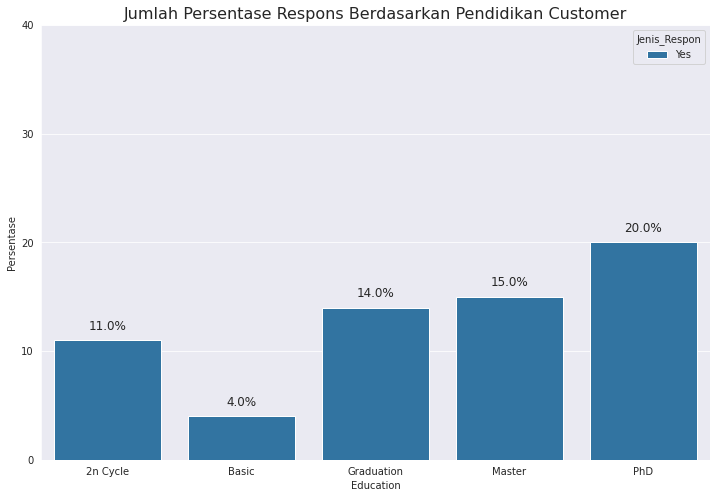

In [ ]:
plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')
sns.barplot(x= 'Education', y= 'Persentase', data= education2, hue = education2['Jenis_Respon'])
plt.yticks(range(0, 50, 10));
plt.title('Jumlah Persentase Respons Berdasarkan Pendidikan Customer', fontsize = 16 )

x = education2['Education']
y = education2['Persentase']

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i]/1, y = y[i]+1, s = str(y[i])+'%', size = 12, ha='center')
plt.savefig('Pendidikan.png')

Insight : Customer dengan latar belakang PhD adalah customer yang paling banyak meresponse campaign yaitu sesebar 20%

##### A.2 Marital Status terhadap Response

In [ ]:
marital = df_new.groupby(['MaritalStat','Jenis_Respon'])['ID'].count().reset_index()
marital['Persentase'] = round(marital['ID']/marital.groupby(['MaritalStat'])['ID'].transform('sum')*100.0)
marital

,MaritalStat,Jenis_Respon,ID,Persentase
0,NotSingle,No,1161,89.0
1,NotSingle,Yes,142,11.0
2,Single,No,571,78.0
3,Single,Yes,161,22.0


In [ ]:
marital2 = marital.drop([0, 2]).reset_index()
marital2

,index,MaritalStat,Jenis_Respon,ID,Persentase
0,1,NotSingle,Yes,142,11.0
1,3,Single,Yes,161,22.0


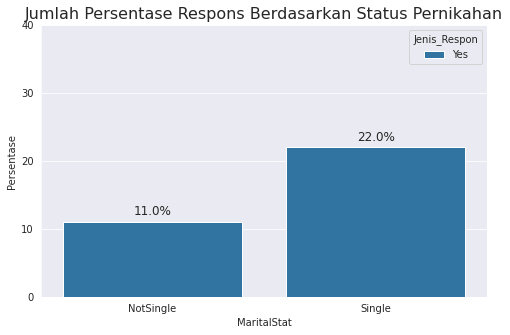

In [ ]:
plt.figure(figsize=(8, 5))
sns.set_style('darkgrid')
sns.barplot(x= 'MaritalStat', y= 'Persentase', data= marital2, hue = marital2['Jenis_Respon'])
plt.yticks(range(0, 50, 10));
plt.title('Jumlah Persentase Respons Berdasarkan Status Pernikahan', fontsize = 16 )

x = marital2['MaritalStat']
y = marital2['Persentase']

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i]/1, y = y[i]+1, s = str(y[i])+'%', size = 12, ha='center')
plt.savefig('Pernikahan.png')

Insight : Berdasarkan data tersebut diketahui sebesar 22% yang merespon campaign adalah customer dengan status single

##### A.3 Income Terhadap Response 

In [ ]:
df_new['Income'].describe()

count      2035.000000
mean      52054.337592
std       21488.405797
min        1730.000000
25%       35694.500000
50%       51876.000000
75%       68277.500000
max      162397.000000
Name: Income, dtype: float64

In [ ]:
def segment(x): 
    if x['Income'] >= 68522:
        segment = 'High Income'
    elif x['Income'] >= 51381 and x['Income']<=68522:
        segment = 'Medium Income'
    else:
        segment = 'Low Income'
    return segment

In [ ]:
df_new['Income_Category'] = df_new.apply(lambda x: segment(x), axis=1)
income = df_new.groupby(['Income_Category','Jenis_Respon'])['ID'].count().reset_index()
income['Income_Category_Total'] = income.groupby(['Income_Category'])['ID'].transform('sum')
income['Persentase'] = round(income['ID']/income['Income_Category_Total']*100.0)
income

,Income_Category,Jenis_Respon,ID,Income_Category_Total,Persentase
0,High Income,No,368,503,73.0
1,High Income,Yes,135,503,27.0
2,Low Income,No,890,1003,89.0
3,Low Income,Yes,113,1003,11.0
4,Medium Income,No,474,529,90.0
5,Medium Income,Yes,55,529,10.0


In [ ]:
income2 = income.drop([0,2,4]).reset_index()
income2

,index,Income_Category,Jenis_Respon,ID,Income_Category_Total,Persentase
0,1,High Income,Yes,135,503,27.0
1,3,Low Income,Yes,113,1003,11.0
2,5,Medium Income,Yes,55,529,10.0


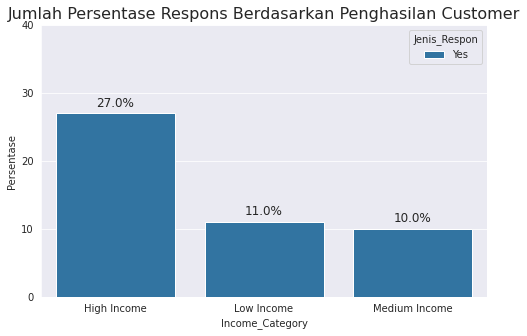

In [ ]:
plt.figure(figsize=(8, 5))
sns.set_style('darkgrid')
sns.barplot(x= 'Income_Category', y= 'Persentase', data= income2, hue = income2['Jenis_Respon'])
plt.yticks(range(0, 50, 10))
plt.title('Jumlah Persentase Respons Berdasarkan Penghasilan Customer', fontsize = 16 )

x = income2['Income_Category']
y = income2['Persentase']

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i]/1, y = y[i]+1, s = str(y[i])+'%', size = 12, ha='center')
plt.savefig('Penghasilan.png')

Nilai Income ini dikategorikan menjadi 3 kelompok :

- Kategori High Income = Penghasilan lebih dari $68522 (yang diambil dari nilai Q3 (75%))

- Kategori Medium Income = Penghasilan kurang dari 68522 dan lebih dari $51381 ( yang diambil dari nilai Q2/median(50%))

- Kategori Low Income = Penghasilan kurang dari $51381 (nilai Q2)

Insight : Semakin tinggi income customer, semakin besar peluang untuk menerima campaign yang diberikan. 

##### A.4 Tahun Kelahiran Terhadap Response

In [ ]:
df_new['Year_Birth'].describe()

count    2035.000000
mean     1968.869287
std        11.674444
min      1940.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [ ]:
def segment(x): 
    if x['Year_Birth'] <= 1959:
      segment = 'Elderly'
    elif x['Year_Birth'] <= 1970:
      segment = 'Pra Elderly'
    elif x['Year_Birth'] <= 1977:
      segment = 'Middle-Age'
    else:
      segment = 'Adults'
        
    return segment

In [ ]:
df_new['Age_Category'] = df_new.apply(lambda x: segment(x), axis=1)
age = df_new.groupby(['Age_Category','Jenis_Respon'])['ID'].count().reset_index()
age['Age_Category_Total'] = age.groupby(['Age_Category'])['ID'].transform('sum')
age['Persentase'] = round(age['ID']/age['Age_Category_Total']*100.0)
age

,Age_Category,Jenis_Respon,ID,Age_Category_Total,Persentase
0,Adults,No,421,504,84.0
1,Adults,Yes,83,504,16.0
2,Elderly,No,444,521,85.0
3,Elderly,Yes,77,521,15.0
4,Middle-Age,No,414,482,86.0
5,Middle-Age,Yes,68,482,14.0
6,Pra Elderly,No,453,528,86.0
7,Pra Elderly,Yes,75,528,14.0


In [ ]:
age2 = age.drop([0,2,4,6]).reset_index()
age2

,index,Age_Category,Jenis_Respon,ID,Age_Category_Total,Persentase
0,1,Adults,Yes,83,504,16.0
1,3,Elderly,Yes,77,521,15.0
2,5,Middle-Age,Yes,68,482,14.0
3,7,Pra Elderly,Yes,75,528,14.0


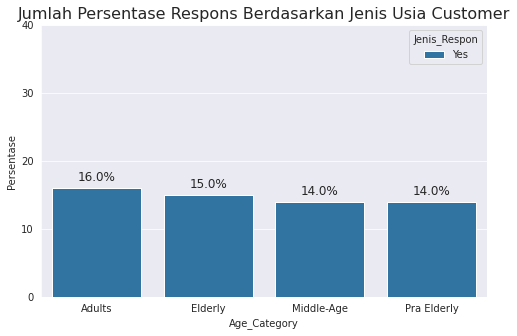

In [ ]:
plt.figure(figsize=(8, 5))
sns.set_style('darkgrid')
sns.barplot(x= 'Age_Category', y= 'Persentase', data= age2, hue = age2['Jenis_Respon'])
plt.yticks(range(0, 50, 10))
plt.title('Jumlah Persentase Respons Berdasarkan Jenis Usia Customer', fontsize = 16 )

x = age2['Age_Category']
y = age2['Persentase']

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i]/1, y = y[i]+1, s = str(y[i])+'%', size = 12, ha='center')
plt.savefig('Jenis Usia.png')

Kategori Umur ini terbagi menjadi 4 kelompok:

- Adults = Customer yang memiliki tahun kelahiran > tahun 1977
- Middle-Age = Customer yang memiliki tahun kelahiran tahun 1970 - 1977
- Pra Elderly = Customer yang memiliki tahun kelahiran tahun 1959 - 1970
- Elderly = Customer yang memiliki tahun kelahiran < tahun 1959

Insight : sebesar 16% yang merespon campaign yang diberikan adalah customer yang berumur Adults.

In [ ]:
df_new.columns

Index(['ID', 'Year_Birth', 'Education', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Year_Customer', 'Child',
       'Monetary', 'Frequency', 'MaritalStat', 'AcceptedCmp', 'TopCategory',
       'MaritalStat_NotSingle', 'MaritalStat_Single', 'Education_2n Cycle',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Jenis_Respon', 'Income_Category', 'Age_Category'],
      dtype='object')

##### A.5 Jumlah Anak Terhadap Response

In [ ]:
child_resp = df_new.groupby(['Child','Jenis_Respon'])['ID'].count().reset_index()
child_resp['total_child']=child_resp.groupby(['Child'])['ID'].transform('sum')
child_resp['Percentage']= round(child_resp['ID']/child_resp['total_child']*100.0,2)
child_resp

,Child,Jenis_Respon,ID,total_child,Percentage
0,0,No,417,573,72.77
1,0,Yes,156,573,27.23
2,1,No,927,1033,89.74
3,1,Yes,106,1033,10.26
4,2,No,342,381,89.76
5,2,Yes,39,381,10.24
6,3,No,46,48,95.83
7,3,Yes,2,48,4.17


In [ ]:
child_resp2 = child_resp.drop ([0,2,4,6]). reset_index()
child_resp2 

,index,Child,Jenis_Respon,ID,total_child,Percentage
0,1,0,Yes,156,573,27.23
1,3,1,Yes,106,1033,10.26
2,5,2,Yes,39,381,10.24
3,7,3,Yes,2,48,4.17


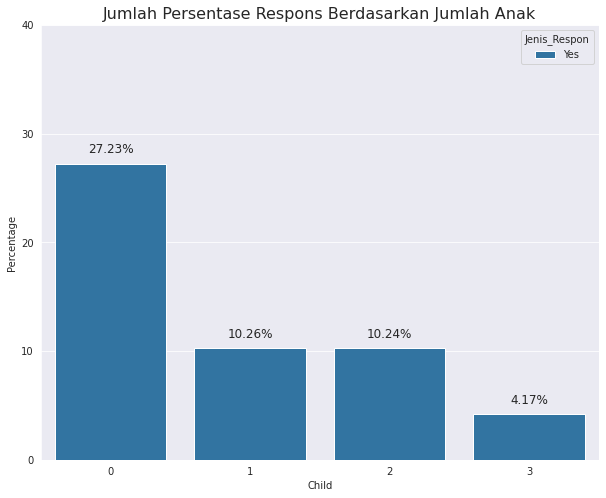

In [ ]:
plt.figure(figsize=(10, 8))
sns.set_style('darkgrid')
sns.barplot(x= 'Child', y= 'Percentage', data=child_resp2, hue = child_resp2['Jenis_Respon'])
plt.yticks(range(0, 50, 10));
plt.title('Jumlah Persentase Respons Berdasarkan Jumlah Anak', fontsize = 16 )

x = child_resp2['Child']
y = child_resp2['Percentage']

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i]/1, y = y[i]+1, s = str(y[i])+'%', size = 12, ha='center')
plt.savefig('Jumlah Anak.png')

Insight : sebesar 27.23% yang merespon campaign yang diberikan adalah customer yang tidak memiliki anak.

#### B. Recency, Monetary, Frequency, terhadap Response

In [ ]:
df_new_rfm = df_new[["ID", "Recency", "Frequency", "Monetary", "Jenis_Respon"]]
df_new_rfm

,ID,Recency,Frequency,Monetary,Jenis_Respon
0,5524,58,22,1617,Yes
1,2174,38,4,27,No
2,4141,26,20,776,No
3,6182,26,6,53,No
4,5324,94,14,422,No
...,...,...,...,...,...
2232,8080,50,3,22,No
2235,10870,46,16,1341,No
2237,7270,91,18,1241,No
2238,8235,8,21,843,No


In [ ]:
df_new_rfm.describe()

,ID,Recency,Frequency,Monetary
count,2035.000000,2035.000000,2035.000000,2035.000000
mean,5588.227027,49.104177,12.540049,606.078133
std,3255.774536,28.968857,7.189303,601.669453
min,0.000000,0.000000,0.000000,5.000000
25%,2804.500000,24.000000,6.000000,69.000000
50%,5493.000000,49.000000,12.000000,396.000000
75%,8428.500000,74.000000,18.000000,1044.500000
max,11191.000000,99.000000,32.000000,2525.000000


In [ ]:
df_new_rfm['R_Percentile'] = df_new_rfm['Recency'].apply(lambda x: 4 if x>=74 else 
                                              3 if x>=49 else 2 if x>=24 else 1)
df_new_rfm['F_Percentile'] = df_new_rfm['Frequency'].apply(lambda x: 4 if x>=18 else 
                                              3 if x>=12 else 2 if x>=6 else 1)
df_new_rfm['M_Percentile'] = df_new_rfm['Monetary'].apply(lambda x: 4 if x>=1044 else 
                                              3 if x>=396 else 2 if x>=69 else 1)
df_new_rfm.head()

,ID,Recency,Frequency,Monetary,Jenis_Respon,R_Percentile,F_Percentile,M_Percentile
0,5524,58,22,1617,Yes,3,4,4
1,2174,38,4,27,No,2,1,1
2,4141,26,20,776,No,2,4,3
3,6182,26,6,53,No,2,2,1
4,5324,94,14,422,No,4,3,3


##### B.1 Recency terhadap Response

In [ ]:
Recency_Response= df_new_rfm.groupby(['R_Percentile', 'Jenis_Respon']). agg({'ID': ['count']}).reset_index()
Recency_Response.columns = ['R_Percentile','Jenis_Respon', 'Customer']
Recency_Response['total_customer'] = Recency_Response.groupby(['R_Percentile'])['Customer'].transform('sum')
Recency_Response['Percentage'] = round(Recency_Response['Customer']/Recency_Response['total_customer']*100.0)
Recency_Response

,R_Percentile,Jenis_Respon,Customer,total_customer,Percentage
0,1,No,359,490,73.0
1,1,Yes,131,490,27.0
2,2,No,425,501,85.0
3,2,Yes,76,501,15.0
4,3,No,461,520,89.0
5,3,Yes,59,520,11.0
6,4,No,487,524,93.0
7,4,Yes,37,524,7.0


In [ ]:
Recency_Response2 = Recency_Response.drop([0,2,4,6]).reset_index()

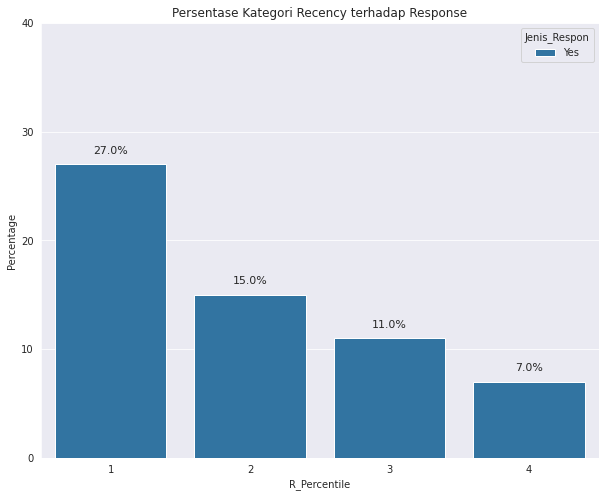

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='R_Percentile', y= 'Percentage', hue = 'Jenis_Respon', data=Recency_Response2)
plt.yticks(range(0, 50, 10));
plt.title('Persentase Kategori Recency terhadap Response', fontsize = 12)
x = Recency_Response2['R_Percentile']
y = Recency_Response2['Percentage']

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i]/1, y = y[i]+1, s = str(y[i])+'%', size = 11, ha='center')
plt.savefig('Recency.png')

Recency merupakan rentang waktu transaksi terakhir pelanggan hingga saat ini.  Nilai recency ini dikategorikan menjadi 4 kelompok : 
- Kategori 1 = 0  - 23 hari 
- Kategori 2 = 24  - 48 hari
- Kategori 3 = 49 - 73 hari 
- Kategori 4 = 74 - 99 hari

Berdasarkan dari kategori Recency, customer yang memiliki response rate paling tinggi adalah customer yang melakukan transaksi terakhir dibawah 24 hari, yaitu 27%.

##### B.2 Frequency terhadap Response

In [ ]:
df_freq= df_new_rfm.groupby(['F_Percentile', 'Jenis_Respon']). agg({'ID': ['count']}).reset_index()
df_freq.columns = ['F_Percentile','Jenis_Respon', 'Customer']
df_freq['total_customer'] = df_freq.groupby(['F_Percentile'])['Customer'].transform('sum')
df_freq['Percentage'] = round(df_freq['Customer']/df_freq['total_customer']*100.2)
df_freq

,F_Percentile,Jenis_Respon,Customer,total_customer,Percentage
0,1,No,441,472,94.0
1,1,Yes,31,472,7.0
2,2,No,441,498,89.0
3,2,Yes,57,498,11.0
4,3,No,383,467,82.0
5,3,Yes,84,467,18.0
6,4,No,467,598,78.0
7,4,Yes,131,598,22.0


In [ ]:
df_freq2 = df_freq.drop([0,2,4,6]). reset_index()

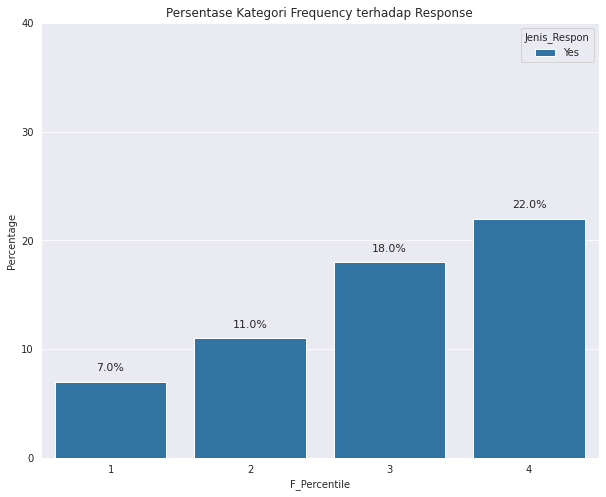

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='F_Percentile', y= 'Percentage', hue = 'Jenis_Respon', data=df_freq2)
plt.yticks(range(0, 50, 10));
plt.title('Persentase Kategori Frequency terhadap Response', fontsize = 12)
x = df_freq2['F_Percentile']
y = df_freq2['Percentage']
z = df_freq2['Jenis_Respon']

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i]/1, y = y[i]+1, s = str(y[i])+'%', size = 11, ha='center')
plt.savefig('Frekuensi.png')

Frequency merupakan seberapa banyak transaksi yang dilakukan per customer dilihat platform pembelian (NumWebPurchases, NumCatalogPurchases, NumStorePurchases). Dengan penjelasan kategori sebagai berikut 

- Kategori 1 = 0 - 5 kali
- Kategori 2 = 6 - 11 kali 
- Kategori 3 = 12 - 18 kali 
- Kategori 4 = 18 - 32 kali 

Berdasarkan Frequency, customer yang memilki respon rate paling tinggi adalah yang customer yang melakukan pembelian diatas 18 kali, yaitu sebesar 21%. Artinya, semakin sering customer melakukan transaksi melalui web, catalog, atau in store, maka peluang menerima campaign selanjutnya semakin tinggi. 

##### B.3 Monetary terhadap Response

In [ ]:
df_mon = df_new_rfm.groupby(['M_Percentile', 'Jenis_Respon']). agg({'ID': ['count']}).reset_index()
df_mon.columns = ['M_Percentile','Jenis_Respon', 'Customer']
df_mon['total_customer'] = df_mon.groupby(['M_Percentile'])['Customer'].transform('sum')
df_mon['Percentage'] = round(df_mon['Customer']/df_mon['total_customer']*100.0)
df_mon

,M_Percentile,Jenis_Respon,Customer,total_customer,Percentage
0,1,No,480,507,95.0
1,1,Yes,27,507,5.0
2,2,No,444,508,87.0
3,2,Yes,64,508,13.0
4,3,No,451,510,88.0
5,3,Yes,59,510,12.0
6,4,No,357,510,70.0
7,4,Yes,153,510,30.0


In [ ]:
df_mon2 = df_mon.drop([0,2,4,6]). reset_index()

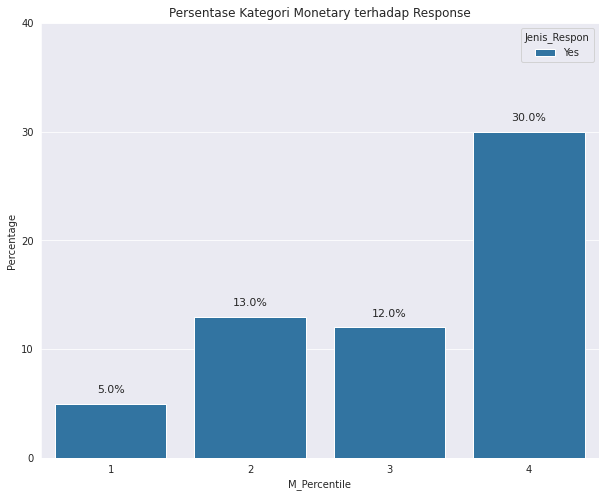

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='M_Percentile', y= 'Percentage', hue = 'Jenis_Respon', data=df_mon2)
plt.yticks(range(0, 50, 10));
plt.title('Persentase Kategori Monetary terhadap Response', fontsize = 12)
x = df_mon2['M_Percentile']
y = df_mon2['Percentage']
z = df_mon2['Jenis_Respon']

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i]/1, y = y[i]+1, s = str(y[i])+'%', size = 11, ha='center')
plt.savefig('Monetary.png')

Monetary merupakan Total pembelian yang dilakukan oleh customer selama 2 tahun terakhir.

- Kategori 1 = $5 - $68 
- Kategori 2 = $69 - $395
- Kategori 3 = $396 - $1044
- Kategori 4 = >= $1045

Berdasarkan Monetary dapat disimpulkan response rate tertinggi yaitu pada customer yang melakukan total pembelian diatas $1045, yaitu sebesar 30%. Artinya, semakin besar total pembelian yang dilakukan peluang menerima campaign selanjutnya semakin besar.

##### B.4 Kategori RFM

In [ ]:
def segment(x): 
    if x['R_Percentile'] >2 and x['F_Percentile'] <3 and x['M_Percentile'] <3: 
        segment = 'lowest'
    elif x['R_Percentile'] <3 and x['F_Percentile'] <3 and x['M_Percentile'] <3:
        segment = 'Medium'
    elif x['R_Percentile'] >2 and x['F_Percentile'] >2 and x['M_Percentile'] >2:
        segment = 'High'
    else:
        segment = 'highest'
        
    return segment

In [ ]:
df_new_rfm['Customer_Segment'] = df_new_rfm.apply(lambda x: segment(x), axis=1)
df_new_rfm.head()

,ID,Recency,Frequency,Monetary,Jenis_Respon,R_Percentile,F_Percentile,M_Percentile,Customer_Segment
0,5524,58,22,1617,Yes,3,4,4,High
1,2174,38,4,27,No,2,1,1,Medium
2,4141,26,20,776,No,2,4,3,highest
3,6182,26,6,53,No,2,2,1,Medium
4,5324,94,14,422,No,4,3,3,High


In [ ]:
df_grouped = df_new_rfm.groupby([ 'Jenis_Respon','Customer_Segment']). agg({'ID': ['count']}).reset_index()
df_grouped.columns = ['Jenis_Respon', 'Customer_Segment', 'Customer']
df_grouped['total_customers'] = df_grouped.groupby(['Customer_Segment'])['Customer'].transform('sum')
df_grouped['percentage'] = round(df_grouped['Customer']/df_grouped['total_customers']*100.0)
df_grouped

,Jenis_Respon,Customer_Segment,Customer,total_customers,percentage
0,No,High,439,514,85.0
1,No,Medium,392,458,86.0
2,No,highest,428,571,75.0
3,No,lowest,473,492,96.0
4,Yes,High,75,514,15.0
5,Yes,Medium,66,458,14.0
6,Yes,highest,143,571,25.0
7,Yes,lowest,19,492,4.0


In [ ]:
df_grouped2 = df_grouped.drop([0,1,2,3,]).reset_index()

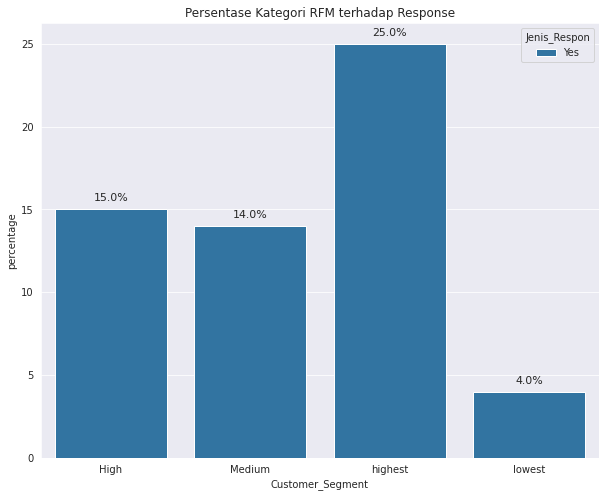

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='Customer_Segment', y= 'percentage', hue = 'Jenis_Respon', data=df_grouped2)
plt.title('Persentase Kategori RFM terhadap Response', fontsize = 12)
x = df_grouped2['Customer_Segment']
y = df_grouped2['percentage']
z = df_grouped2['Jenis_Respon']

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i]/1, y = y[i]+0.5, s = str(y[i])+'%', size = 11, ha='center')

#### C. Purchases terhadap Response

##### C.1 Jumlah Pembelian Berdasarkan Platform terhadap Response

In [ ]:
Nums = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Frequency']

In [ ]:
GrEdu = df_new.groupby(['Education','Jenis_Respon'])[Nums].sum().reset_index()
GrM = df_new.groupby(['MaritalStat','Jenis_Respon'])[Nums].sum().reset_index()
GrRes = df_new.groupby(['Jenis_Respon'])[Nums].sum().reset_index()

In [ ]:
perc = ['PercNumDealsPurchases', 'PercNumWebPurchases','PercNumCatalogPurchases', 'PercNumStorePurchases','PercNumWebVisitsMonth', 'PercFrequency']

In [ ]:
for i,col in GrEdu.iteritems():
    if 'Num' in i:
        GrEdu['Perc'+i] = round(GrEdu[i]/GrEdu.groupby(['Education'])[i].transform('sum')*100,2)
for i,col in GrM.iteritems():
    if 'Num' in i:
        GrM['Perc'+i] = round(GrM[i]/GrM.groupby(['MaritalStat'])[i].transform('sum')*100)
for i,col in GrRes.iteritems():
    if 'Num' in i:
        GrRes['Perc'+i]=round(GrRes[i]/GrRes[i].sum()*100)

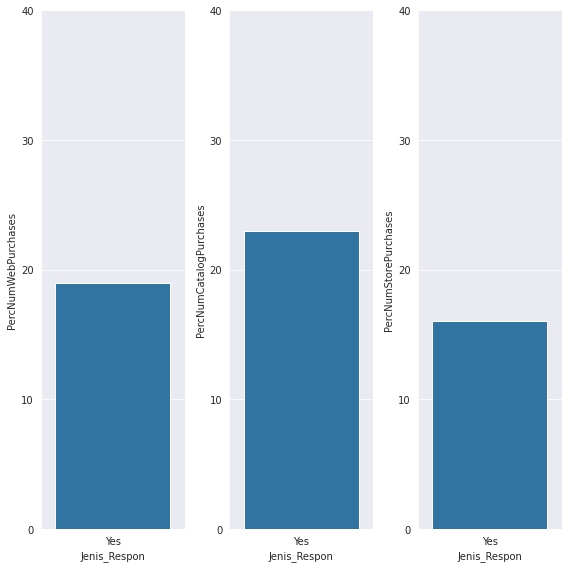

In [ ]:
Prc = ['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']
GrPrc = df_new.groupby(['Jenis_Respon'])[Prc].sum().reset_index()
for i,col in GrPrc.iteritems():
    if 'Num' in i:
        GrPrc['Perc'+i]=round(GrPrc[i]/GrPrc[i].sum()*100)
PerPrc = ['PercNumWebPurchases','PercNumCatalogPurchases', 'PercNumStorePurchases']  
GrPrc1 = GrPrc[GrPrc['Jenis_Respon']=='Yes']
plt.figure(figsize=(8, 8))
for i in range(0, len(Prc)-0):
    plt.subplot(1, len(Prc)/1, i+1)
    sns.barplot(GrPrc1['Jenis_Respon'],GrPrc1[PerPrc[i]])
    plt.yticks(range(0, 50, 10));
    #plt.title('Persentase Respon Yes Berdasarkan Platform Pembelian', fontsize = 12)
    plt.tight_layout()
    x = GrPrc1[PerPrc[i]]
    y = GrPrc1['Jenis_Respon']
    z = GrPrc1[PerPrc[i]]
    x_numbers = range(len(x))
#for i in x_numbers:
  #plt.text(x = x_numbers[i]/2, y = x[i]+1, s = str(z[i])+'%', size = 13, ha='center')
plt.savefig('Platform3.png')

Insight : response rate tertinggi yaitu pada customer yang melakukan pembelanjaan melalui Catalog yaitu sebesar 23%. Artinya, peluang menerima campaign selanjutnya semakin besar ada pada platform katalog.

##### C.2 Jumlah Pembelian - Education - Response

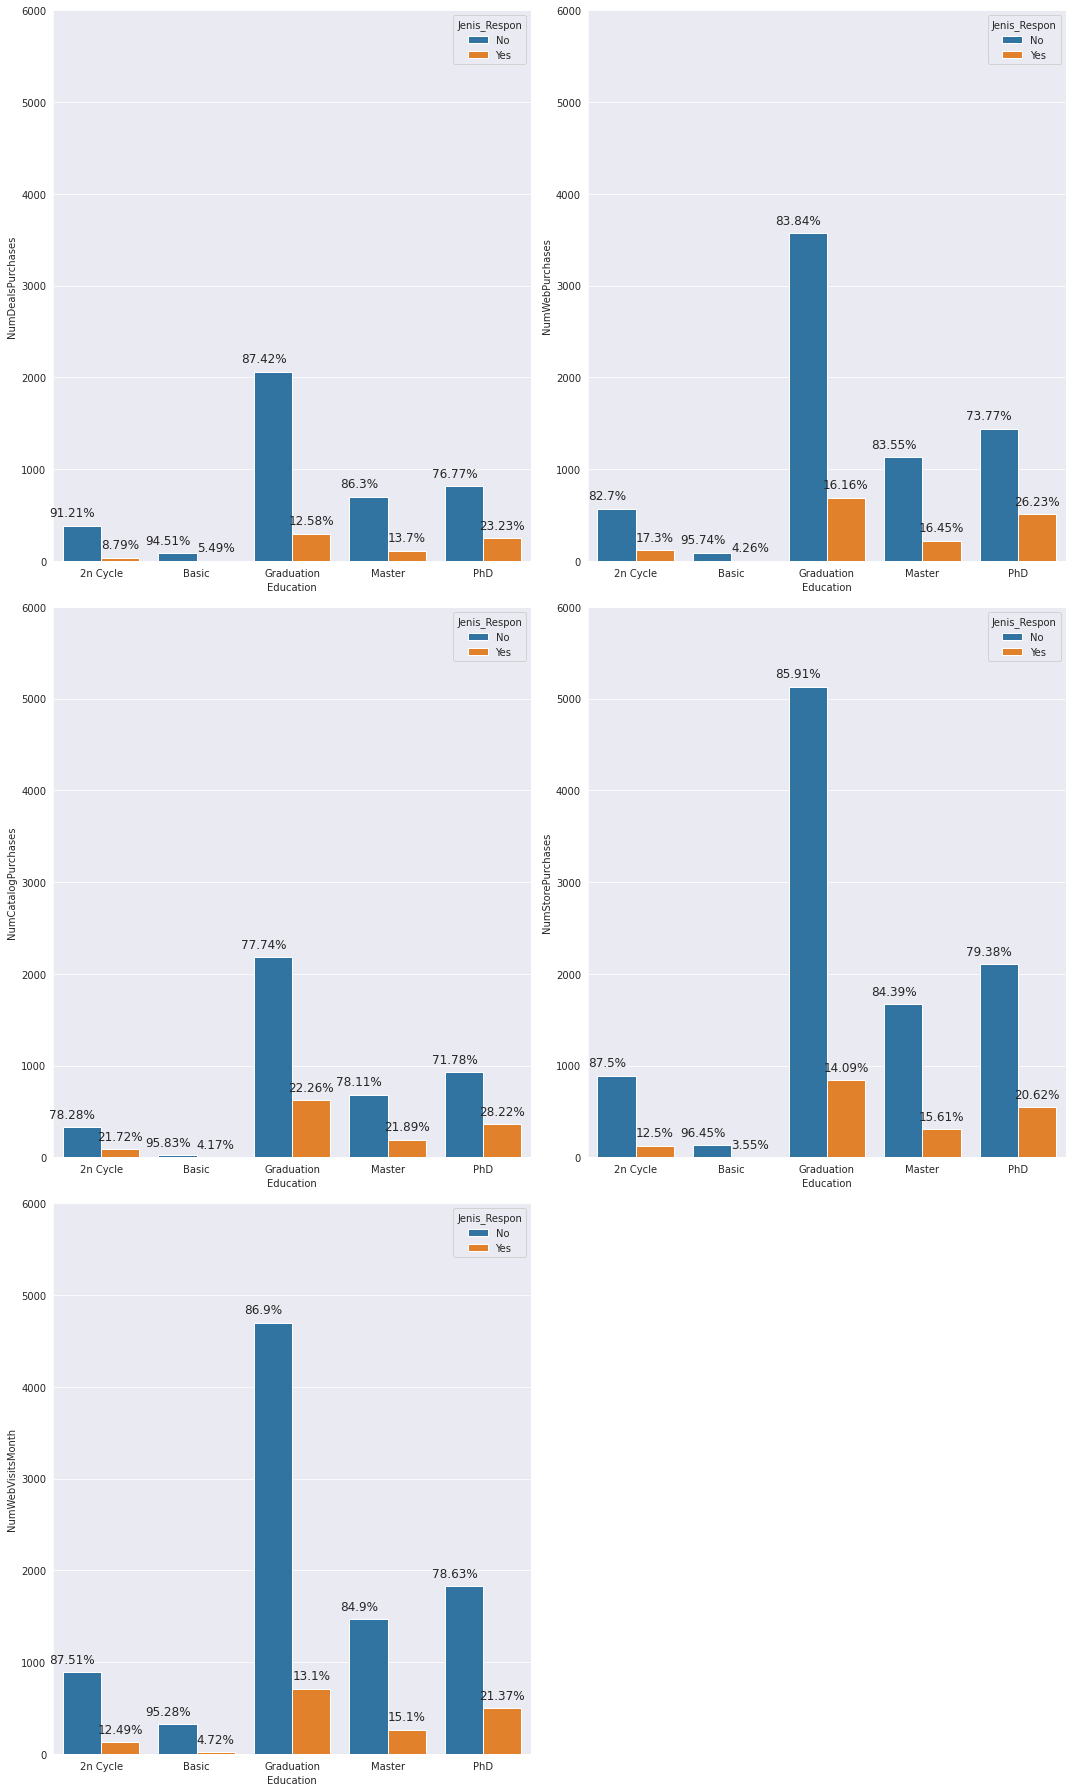

In [ ]:
plt.figure(figsize=(15, 25))
for i in range(0, len(Nums)-1):
    plt.subplot(3, len(Nums)/2-1, i+1)
    sns.barplot(GrEdu['Education'],GrEdu[Nums[i]],hue = GrEdu['Jenis_Respon'])
    plt.yticks(range(0, 7000, 1000));
    plt.tight_layout()
    x = GrEdu[Nums[i]]
    y = GrEdu['Education']
    z = GrEdu[perc[i]]
    x_numbers = range(len(x))
    for i in x_numbers:
        plt.text(x = x_numbers[i]/2-.3, y = x[i]+100, s = str(z[i])+'%', size = 12, ha='center')
plt.savefig('totalpurchase.png')

##### C.3 Jumlah Pembelian - Marital Status - Response

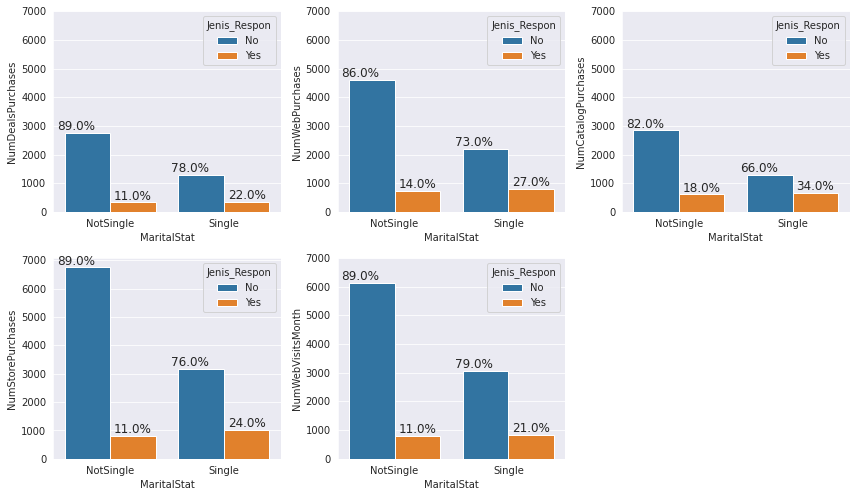

In [ ]:
plt.figure(figsize=(12, 10))
for i in range(0, len(Nums)-1):
    plt.subplot(3, len(Nums)/2, i+1)
    sns.barplot(GrM['MaritalStat'],GrM[Nums[i]],hue = GrM['Jenis_Respon'])
    plt.yticks(range(0, 8000, 1000));
    plt.tight_layout()
    x = GrM[Nums[i]]
    y = GrM['MaritalStat']
    z = GrM[perc[i]]
    x_numbers = range(len(x))
    for i in x_numbers:
        plt.text(x = x_numbers[i]/2-.3, y = x[i]+100, s = str(z[i])+'%', size = 12, ha='center')
plt.savefig('totalpurchasestatus.png')

#### D. Products terhadap Response

<Figure size 1080x720 with 0 Axes>

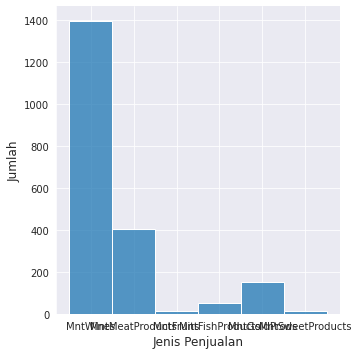

In [ ]:
plt.figure(figsize=(15,10))
sns.displot(df_new['TopCategory'], kde=False);
plt.xlabel('Jenis Penjualan', fontsize = 12)
plt.ylabel('Jumlah', fontsize = 12);

In [ ]:
perMnt =['PercMntWines','PercMntFruits', 'PercMntMeatProducts', 'PercMntFishProducts','PercMntSweetProducts', 'PercMntGoldProds']
Mnt = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
GrMnt = df_new.groupby(['Jenis_Respon'])[Mnt].sum().reset_index()
for i,col in GrMnt.iteritems():
    if 'Mnt' in i:
        GrMnt['Perc'+i]=round(GrMnt[i]/GrMnt[i].sum()*100)

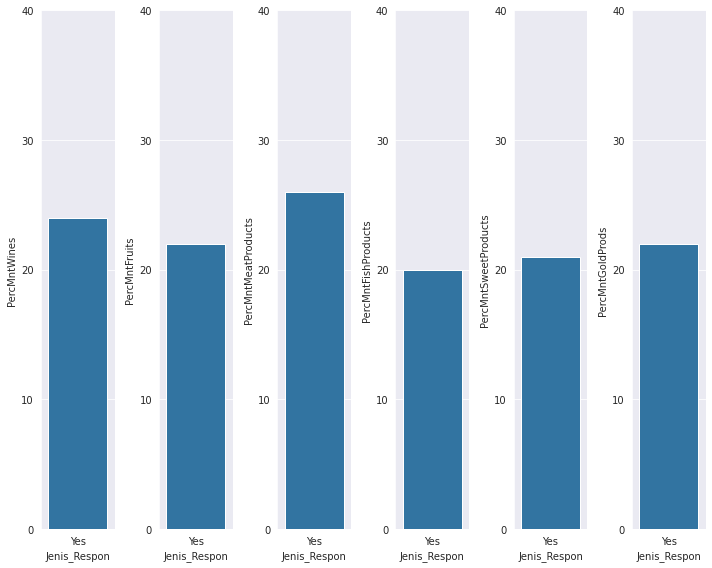

In [ ]:
Prod = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
GrPro = df_new.groupby(['Jenis_Respon'])[Prod].sum().reset_index()
for i,col in GrPro.iteritems():
    if 'Mnt' in i:
        GrPro['Perc'+i]=round(GrPro[i]/GrPro[i].sum()*100)
PerPro = ['PercMntWines', 'PercMntFruits','PercMntMeatProducts', 'PercMntFishProducts', 'PercMntSweetProducts','PercMntGoldProds']  
GrPro1 = GrPro[GrPro['Jenis_Respon']=='Yes']
plt.figure(figsize=(10,8))
for i in range(0, len(Prod)-0):
    plt.subplot(1, len(Prod)/1, i+1)
    sns.barplot(GrPro1['Jenis_Respon'],GrPro1[PerPro[i]])
    plt.yticks(range(0, 50, 10));
    plt.tight_layout()
    x = GrPro1[PerPro[i]]
    y = GrPro1['Jenis_Respon']
    z = GrPro1[PerPro[i]]
    x_numbers = range(len(x))
    #for i in x_numbers:
     #  plt.text(x = x_numbers[i]/2, y = x[i]+1, s = str(z[i])+'%', size = 13, ha='center')
plt.savefig('Products.png')

Insight : response rate tertinggi yaitu pada customer yang melakukan pembelanjaan Meats yaitu sebesar 26%. Artinya, peluang menerima campaign selanjutnya semakin besar ada pada produk daging.

#### E. Accepted Campaign dan Response

In [ ]:
df_new['group_response'] = np.where(df_new['Response'] == 1, 'Accept','Reject')
jml_resp = df_new.groupby(['group_response'])['ID'].nunique().reset_index()
jml_resp.columns = ['group_response', 'ID']
jml_resp['Persentase'] = round((jml_resp['ID'] / 2035) *100.0)
jml_resp

,group_response,ID,Persentase
0,Accept,303,15.0
1,Reject,1732,85.0


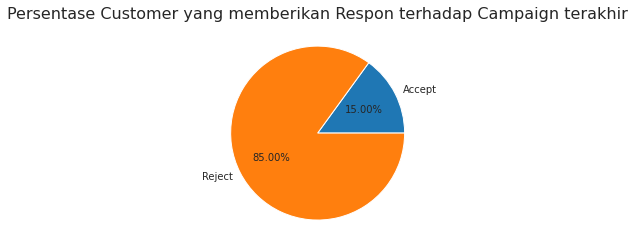

In [ ]:
plt.pie(jml_resp['Persentase'], labels = jml_resp['group_response'], autopct = '%0.2f%%')
plt.title('Persentase Customer yang memberikan Respon terhadap Campaign terakhir', fontsize=16)
plt.savefig('Respon.png')

Terdapat 85% atau sebanyak 1730 customer yang menolak penawaran produk dalam campaign terakhir, dan sebanyak 305 atau 15% customer yang menerima tawaran produk pada campaign terakhir.

In [ ]:
comp_resp = df_new.groupby(['AcceptedCmp','Jenis_Respon'])['ID'].count().reset_index()
comp_resp['total_comp']=comp_resp.groupby(['AcceptedCmp'])['ID'].transform('sum')
comp_resp['Percentage']=round(comp_resp['ID']/comp_resp['total_comp']*100.0,2)
comp_resp

,AcceptedCmp,Jenis_Respon,ID,total_comp,Percentage
0,0,No,1479,1612,91.75
1,0,Yes,133,1612,8.25
2,1,No,206,297,69.36
3,1,Yes,91,297,30.64
4,2,No,38,76,50.00
5,2,Yes,38,76,50.00
6,3,No,8,40,20.00
7,3,Yes,32,40,80.00
8,4,No,1,10,10.00
9,4,Yes,9,10,90.00


In [ ]:
comp_resp2 = comp_resp.drop([0,2,4,6,8]).reset_index()

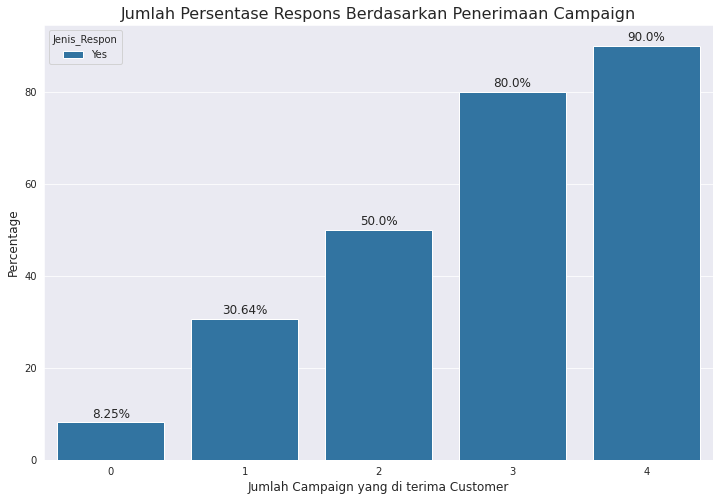

In [ ]:
plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')
sns.barplot(x= 'AcceptedCmp', y= 'Percentage', hue = 'Jenis_Respon', data= comp_resp2)
plt.title('Jumlah Persentase Respons Berdasarkan Penerimaan Campaign', fontsize = 16 )

x = comp_resp2['AcceptedCmp']
y = comp_resp2['Percentage']

plt.xlabel('Jumlah Campaign yang di terima Customer', fontsize = 12)
plt.ylabel('Percentage', fontsize = 12);

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i]/1, y = y[i]+1, s = str(y[i])+'%', size = 12, ha='center')
plt.savefig('AcceptedCmp.png')

Insight : Semakin sering customer menerima campaign maka peluang untuk menerima campaign selanjutnya lebih besar.

## Stage 3 Modelling

#### A. Define Function

In [ ]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option("max_column",100)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from imblearn import under_sampling, over_sampling
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression


def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(66).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

#### B. Split Dataset

In [ ]:
df_new.columns

Index(['ID', 'Year_Birth', 'Education', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Year_Customer', 'Child',
       'Monetary', 'Frequency', 'MaritalStat', 'AcceptedCmp', 'TopCategory',
       'MaritalStat_NotSingle', 'MaritalStat_Single', 'Education_2n Cycle',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Jenis_Respon', 'Income_Category', 'Age_Category',
       'group_response'],
      dtype='object')

In [ ]:
X = df_new[[col for col in df_new.columns if (str(df_new[col].dtype) != 'object') and col not in ['ID', 'Year_Birth', 
                          'Education', 'Income', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 
                          'Complain', 'Response', 'Year_Customer', 'Child','MaritalStat', 'TopCategory', 'MaritalStat_NotSingle', 
                          'MaritalStat_Single', 'Education_2n Cycle', 'Education_Basic', 'Education_Graduation', 'Education_Master', 
                          'Education_PhD', 'Jenis_Respon','Age_Category','Income_Category']]]
                                                                                       
y = df_new['Response'].values
print(X.shape)
print(y.shape)

(2035, 15)
(2035,)


In [ ]:
#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [ ]:
from imblearn import under_sampling, over_sampling
X_U, y_U = under_sampling.RandomUnderSampler(0.5).fit_resample(X_train,y_train)
X_O, y_O = over_sampling.RandomOverSampler(0.5).fit_resample(X_train,y_train)
X_SMOTE, y_SMOTE = over_sampling.SMOTE().fit_resample(X_train, y_train)

In [ ]:
print(pd.Series(y_train).value_counts())
print(pd.Series(y_U).value_counts())
print(pd.Series(y_O).value_counts())
print(pd.Series(y_SMOTE).value_counts())

0    1197
1     227
dtype: int64
0    454
1    227
dtype: int64
0    1197
1     598
dtype: int64
1    1197
0    1197
dtype: int64


#### C. Decision Tree Modeling

##### C.1 Decision Tree

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
DT_O = DecisionTreeClassifier(random_state=50)
DT_O.fit(X_train,y_train)

y_pred_O = DT_O.predict(X_test)
eval_classification(DT_O, y_pred_O, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.38
Recall (Test Set): 0.46
F1-Score (Test Set): 0.42
AUC: 0.68


In [ ]:
y_pred_train = DT_O.predict(X_train)
fpr_test, tpr_test, thresholds = roc_curve(y_test, y_pred_O, pos_label=1)
fpr_train, tpr_train, thresholds = roc_curve(y_train, y_pred_train, pos_label=1)

In [ ]:
print("AUC Test: %.2f" % auc(fpr_test, tpr_test))
print("AUC Train: %.2f" % auc(fpr_train, tpr_train))

AUC Test: 0.68
AUC Train: 1.00


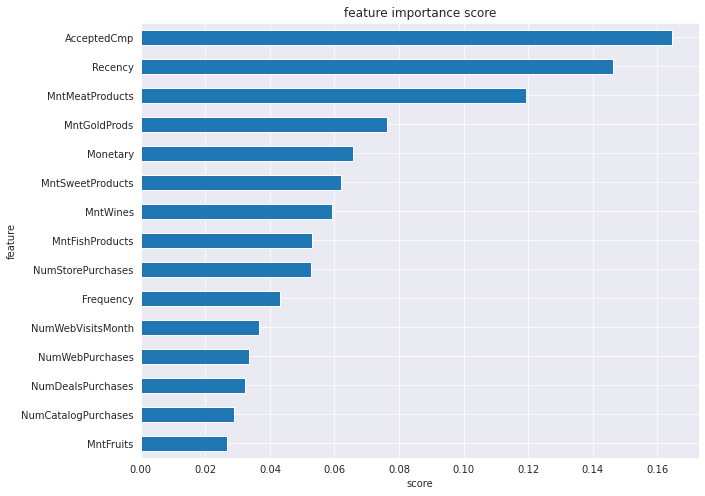

In [ ]:
show_feature_importance(DT_O)
plt.savefig('Feature DT_not tuning.png')

##### C.2 Hyperparameter Decision Tree

In [ ]:
# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 5, num = 20)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50, 100] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=50)
DT_HT_O = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=50)
DT_HT_O.fit(X_train, y_train)

# Predict & Evaluation
y_pred_HTO = DT_HT_O.predict(X_test)#Check performa dari model
eval_classification(DT_HT_O, y_pred_HTO, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.88
Precision (Test Set): 0.53
Recall (Test Set): 0.32
F1-Score (Test Set): 0.40
AUC: 0.64


In [ ]:
y_pred_train_HTO = DT_HT_O.predict(X_train)
fpr_test, tpr_test, thresholds = roc_curve(y_test, y_pred_HTO, pos_label=1)
fpr_train, tpr_train, thresholds = roc_curve(y_train, y_pred_train_HTO, pos_label=1)
print("AUC Test: %.2f" % auc(fpr_test, tpr_test))
print("AUC Train: %.2f" % auc(fpr_train, tpr_train))

AUC Test: 0.64
AUC Train: 0.62


In [ ]:
print('Best max_depth:', DT_HT_O.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', DT_HT_O.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', DT_HT_O.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', DT_HT_O.best_estimator_.get_params()['max_features'])

Best max_depth: 3
Best min_samples_split: 100
Best min_samples_leaf: 10
Best max_features: sqrt


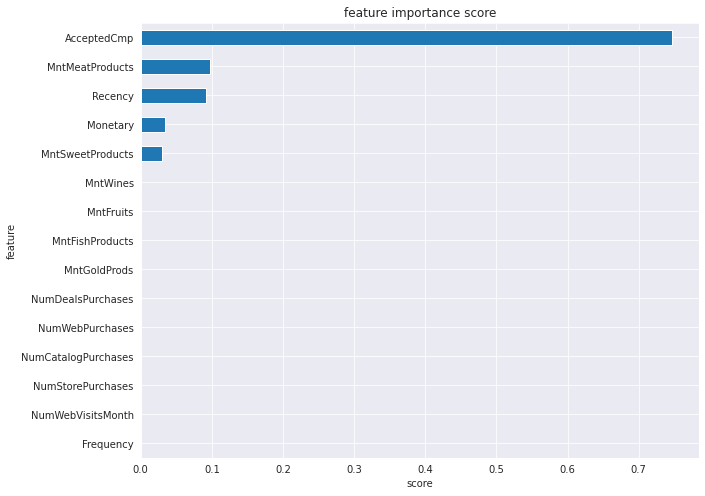

In [ ]:
show_feature_importance(DT_HT_O.best_estimator_)
plt.savefig('Feature DT_tuning.png')

#### D. Random Forest Modeling

##### D.1 Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_O = RandomForestClassifier(random_state=50)
rf_O.fit(X_train,y_train)

y_pred_RFO = rf_O.predict(X_test)
eval_classification(rf_O, y_pred_RFO, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.69
Recall (Test Set): 0.36
F1-Score (Test Set): 0.47
AUC: 0.67


In [ ]:
y_pred_train_RFO = rf_O.predict(X_train)
fpr_test, tpr_test, thresholds = roc_curve(y_test, y_pred_RFO, pos_label=1)
fpr_train, tpr_train, thresholds = roc_curve(y_train, y_pred_train_RFO, pos_label=1)
print("AUC Test: %.2f" % auc(fpr_test, tpr_test))
print("AUC Train: %.2f" % auc(fpr_train, tpr_train))

AUC Test: 0.67
AUC Train: 1.00


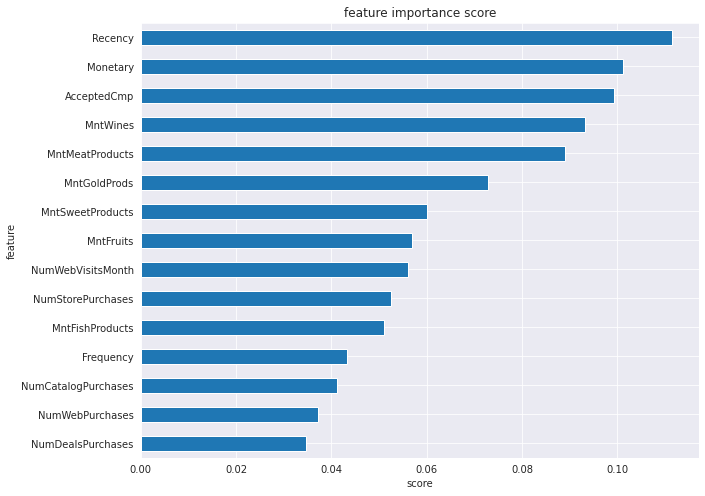

In [ ]:
show_feature_importance(rf_O)
plt.savefig('Feature RF_not tuning.png')

##### D.2 Hyperparameter Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 1, stop = 50, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 50, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=50)
rf_tuned_O = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=50)
rf_tuned_O.fit(X_train,y_train)

# Predict & Evaluation
y_pred_HTRO = rf_tuned_O.predict(X_test)#Check performa dari model
eval_classification(rf_tuned_O, y_pred_HTRO, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.89
Precision (Test Set): 0.57
Recall (Test Set): 0.33
F1-Score (Test Set): 0.42
AUC: 0.65


In [ ]:
y_pred_train_HTRFO = rf_tuned_O.predict(X_train)
fpr_test, tpr_test, thresholds = roc_curve(y_test, y_pred_HTRO, pos_label=1)
fpr_train, tpr_train, thresholds = roc_curve(y_train, y_pred_train_HTRFO, pos_label=1)
print("AUC Test: %.2f" % auc(fpr_test, tpr_test))
print("AUC Train: %.2f" % auc(fpr_train, tpr_train))

AUC Test: 0.65
AUC Train: 0.84


In [ ]:
show_best_hyperparameter(rf_tuned_O.best_estimator_, hyperparameters)

Best n_estimators: 11
Best bootstrap: True
Best criterion: entropy
Best max_depth: 50
Best min_samples_split: 2
Best min_samples_leaf: 3
Best max_features: log2
Best n_jobs: -1


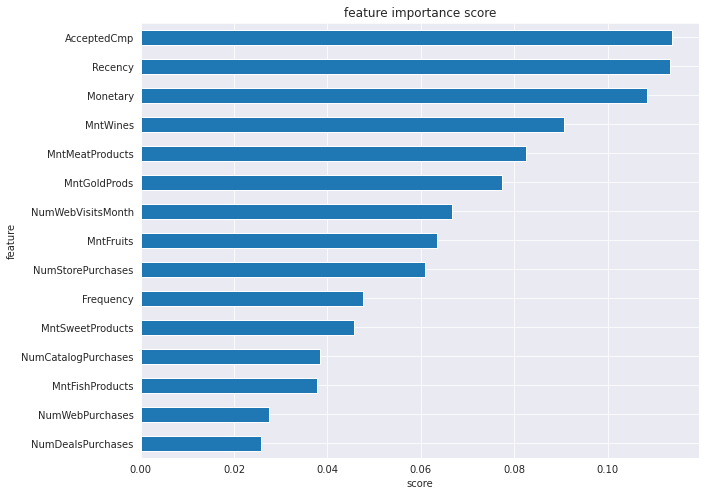

In [ ]:
show_feature_importance(rf_tuned_O.best_estimator_)
plt.savefig('Feature RF_tuning.png')

#### E. XG Boost Modelling

##### E.1 XG Boost

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier, XGBRegressor
xgb = XGBClassifier(random_state=50)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
eval_classification(xgb, y_pred_xgb, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.89
Precision (Test Set): 0.61
Recall (Test Set): 0.39
F1-Score (Test Set): 0.48
AUC: 0.68


In [ ]:
y_pred_train_xgb = xgb.predict(X_train)
fpr_test, tpr_test, thresholds = roc_curve(y_test, y_pred_xgb, pos_label=1)
fpr_train, tpr_train, thresholds = roc_curve(y_train, y_pred_train_xgb, pos_label=1)
print("AUC Test: %.2f" % auc(fpr_test, tpr_test))
print("AUC Train: %.2f" % auc(fpr_train, tpr_train))

AUC Test: 0.68
AUC Train: 0.81


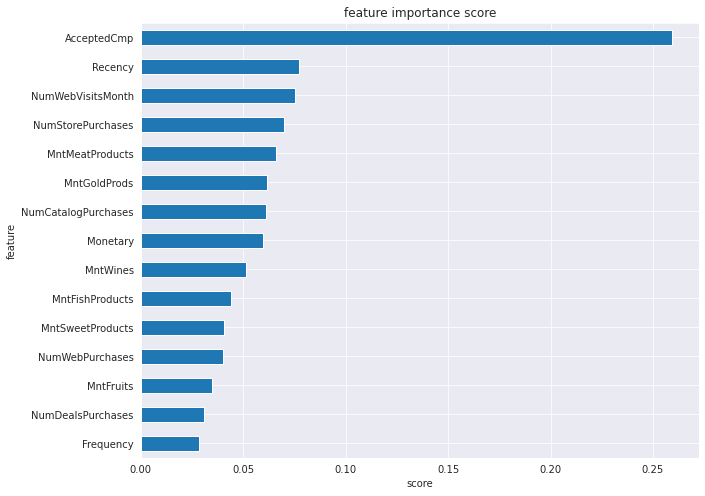

In [ ]:
show_feature_importance(xgb)
plt.savefig('Feature XGB_not tuning.png')

##### E.2 Hyperparameter XG Boost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(1, 5, num = 11)], # 
                    'min_child_weight' : [int(x) for x in np.linspace(1, 30, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 10)], #eta dulu cari yang bagus, lalu cari yg lain
                    }

# Init
xgb = XGBClassifier(random_state=50)
xgb_tuned = RandomizedSearchCV(xgb, hyperparameters, cv=5, random_state=50)
xgb_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred_htxgb = xgb_tuned.predict(X_test)#Check performa dari model
eval_classification(xgb_tuned, y_pred_htxgb, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.62
Recall (Test Set): 0.41
F1-Score (Test Set): 0.49
AUC: 0.69


In [ ]:
y_pred_train_htxgb = xgb_tuned.predict(X_train)
fpr_test, tpr_test, thresholds = roc_curve(y_test, y_pred_htxgb, pos_label=1)
fpr_train, tpr_train, thresholds = roc_curve(y_train, y_pred_train_htxgb, pos_label=1)
print("AUC Test: %.2f" % auc(fpr_test, tpr_test))
print("AUC Train: %.2f" % auc(fpr_train, tpr_train))

AUC Test: 0.69
AUC Train: 0.79


In [ ]:
show_best_hyperparameter(xgb_tuned.best_estimator_, hyperparameters)

Best max_depth: 3
Best min_child_weight: 3
Best gamma: 1.0
Best tree_method: exact
Best colsample_bytree: 0.8
Best eta: 0.2222222222222222


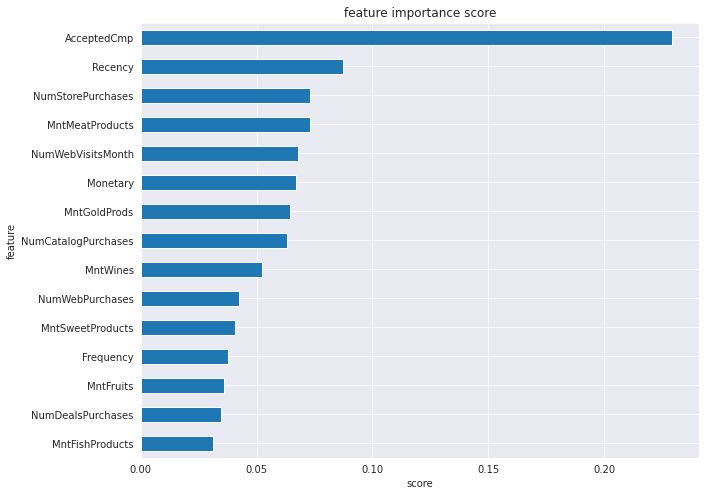

In [ ]:
show_feature_importance(xgb_tuned.best_estimator_)
plt.savefig('Feature XGB_tuning.png')

#### F. Adaboost Modelling

##### F.1 Adaboost Modeling

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=50)
ab.fit(X_train,y_train)

y_pred_ab = ab.predict(X_test)
eval_classification(ab, y_pred_ab, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.61
Recall (Test Set): 0.54
F1-Score (Test Set): 0.57
AUC: 0.75


In [ ]:
y_pred_train_ab = ab.predict(X_train)
fpr_test, tpr_test, thresholds = roc_curve(y_test, y_pred_ab, pos_label=1)
fpr_train, tpr_train, thresholds = roc_curve(y_train, y_pred_train_ab, pos_label=1)
print("AUC Test: %.2f" % auc(fpr_test, tpr_test))
print("AUC Train: %.2f" % auc(fpr_train, tpr_train))

AUC Test: 0.75
AUC Train: 0.72


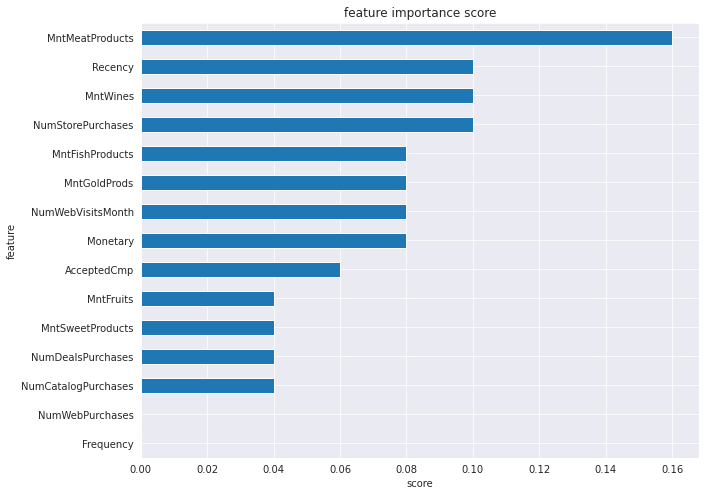

In [ ]:
show_feature_importance(ab)
plt.savefig('Feature AB_not tuning.png')

##### Confusion Matriks

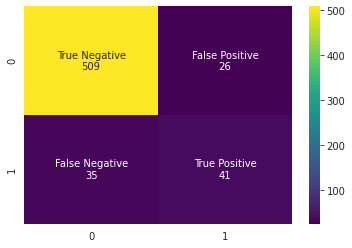

In [ ]:
from sklearn.metrics import confusion_matrix

cnf = confusion_matrix(y_test, y_pred_ab)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                cnf.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
          

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf, annot=labels, fmt='', cmap="viridis")
plt.savefig('Confusion Matrix.png')

- TPR : 95,14%
- FPR : 46,05%

##### C.8 Hyperparameter Adaboost

In [ ]:
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 1, stop = 50, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.01, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=50)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=50, cv=5)
ab_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred_htab = ab_tuned.predict(X_test)#Check performa dari model
eval_classification(ab_tuned, y_pred_htab, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.88
Precision (Test Set): 0.71
Recall (Test Set): 0.07
F1-Score (Test Set): 0.12
AUC: 0.53


In [ ]:
y_pred_train_htab = ab_tuned.predict(X_train)
fpr_test, tpr_test, thresholds = roc_curve(y_test, y_pred_htab, pos_label=1)
fpr_train, tpr_train, thresholds = roc_curve(y_train, y_pred_train_htab, pos_label=1)
print("AUC Test: %.2f" % auc(fpr_test, tpr_test))
print("AUC Train: %.2f" % auc(fpr_train, tpr_train))

AUC Test: 0.53
AUC Train: 0.55


In [ ]:
show_best_hyperparameter(ab_tuned.best_estimator_, hyperparameters)

Best n_estimators: 44
Best learning_rate: 0.08578947368421053
Best algorithm: SAMME.R


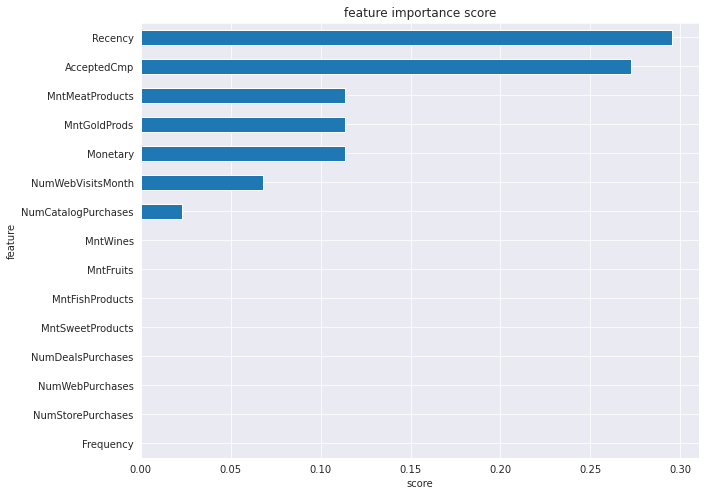

In [ ]:
show_feature_importance(ab_tuned.best_estimator_)
plt.savefig('Feature AB_tuning.png')

Hasil Modelling yang paling bagus adalah pada model Adaboost sebelum di hyperparameter tuning dengan nilai AUC sebesar 0.75 dan tidak overfitting

Sedangkan untuk 4 feature importance tertinggi yaitu `MntMeatProducts, Recency, MntWines, NumStorePurchases`

In [ ]:
y_pred_all = ab.predict(X)

In [ ]:
pd.Series(y_pred_all).value_counts()

0    1821
1     214
dtype: int64

In [ ]:
y_pred_train_ab = ab.predict(X_train)
fpr_test, tpr_test, thresholds = roc_curve(y, y_pred_all, pos_label=1)
fpr_train, tpr_train, thresholds = roc_curve(y_train, y_pred_train_ab, pos_label=1)
print("AUC Test: %.2f" % auc(fpr_test, tpr_test))
print("AUC Train: %.2f" % auc(fpr_train, tpr_train))

AUC Test: 0.73
AUC Train: 0.72


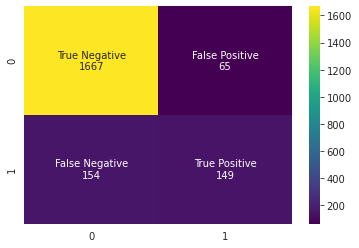

In [ ]:
from sklearn.metrics import confusion_matrix

cnf = confusion_matrix(y, y_pred_all)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                cnf.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
          

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf, annot=labels, fmt='', cmap="viridis")
plt.savefig('Confusion Matrix all.png')